In [4]:
import sys
sys.path.append('../')
import xarray as xr
from Python.open_tpose import tpose2012to2016
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from matplotlib.colors import TwoSlopeNorm
import cmocean.cm as cmo

warnings.filterwarnings("ignore")
plt.rcParams['font.size'] = 13

zMin = -250
zMax = 0

prefix = ['diag_state']

ds = tpose2012to2016(prefix)

N = len(ds.time)
ds['time'] = range(0,N,1)
ds['XC'] = ds.XC.astype(float)
ds['YC'] = ds.YC.astype(float)
ds['Z'] = ds.Z.astype(float)
ds['XG'] = ds.XG.astype(float)
ds['YG'] = ds.YG.astype(float)

# ---------------------------------------------------------------TAO Data ---------------------------------------------------------------------------------
print('Starting TAO')
TAO_file = '/data/SO3/edavenport/TAO_2012to2016_daily/ADCP_2012to2016_0N140W_daily.cdf' # Get the right TAO data 
dsTAO = xr.open_dataset(TAO_file,decode_times=False)
n = len(dsTAO.time)

dsTAO['time'] = range(0,n)

dsTAO['depth'] = -1*dsTAO.depth
depths = dsTAO.depth.data
U_TAO = dsTAO.u_1205.transpose('time','depth','lat','lon')
U_TAO = U_TAO/100 #convert from cm/s to m/s
U_TAO.data[U_TAO.data > 50] = np.nan # change 9999s to nans
latidx = 0
lonTAO140 = 0

U_TAO_140 = U_TAO[:,:,latidx,lonTAO140]

Udepthli = np.argmin(np.abs(depths - zMax))
Udepthui = np.argmin(np.abs(depths - zMin)) + 1

# sample these locations from the TPOSE data
U6_140 = ds.UVEL.interp(XG=[220.0],YC=[U_TAO_140.lat],Z=U_TAO_140.depth,time=U_TAO_140.time,method='linear')

temp = U6_140.values
U6_140 = U_TAO_140.copy(deep=True)
U6_140.values = temp[:,:,0,0]
U6_140 = U6_140 + U_TAO_140 - U_TAO_140
U_140_diff = U6_140 - U_TAO_140

meanU_TAO_140 = np.nanmean(U_TAO_140,axis=0)
stdU_TAO_140 = np.nanstd(U_TAO_140,axis=0)

meanU_TP6_140 = np.nanmean(U6_140,axis=0)
stdU_TP6_140 = np.nanstd(U6_140,axis=0)

V_TAO = dsTAO.v_1206.transpose('time','depth','lat','lon')
V_TAO = V_TAO/100 #convert from cm/s to m/s
V_TAO.data[V_TAO.data > 50] = np.nan # change 9999s to nans

V_TAO_140 = V_TAO[:,:,latidx,lonTAO140]

# sample these locations from the TPOSE data
V6_140 = ds.VVEL.interp(XC=[220.0],YG=[V_TAO_140.lat],Z=V_TAO_140.depth,time=V_TAO_140.time,method='linear')

temp = V6_140.values
V6_140 = V_TAO_140.copy(deep=True)
V6_140.values = temp[:,:,0,0]
V6_140 = V6_140 + V_TAO_140 - V_TAO_140
V_140_diff = V6_140 - V_TAO_140

meanV_TAO_140 = np.nanmean(V_TAO_140,axis=0)
stdV_TAO_140 = np.nanstd(V_TAO_140,axis=0)

meanV_TP6_140 = np.nanmean(V6_140,axis=0)
stdV_TP6_140 = np.nanstd(V6_140,axis=0)

# ---------------------------------------------------------------TAO Data ---------------------------------------------------------------------------------
print('Starting TAO')
TAO_file = '/data/SO3/edavenport/TAO_2012to2016_daily/T_2012to2016_0N140W_daily.cdf' # Get the right TAO data 
dsTAO = xr.open_dataset(TAO_file,decode_times=False)
n = len(dsTAO.time)
latidx = 0
lonTAO140 = 0

if n < N:
    diff = N - n
    dsTAO['time'] = range(diff,N)
else:
    dsTAO['time'] = range(0,n)

dsTAO['depth'] = -1*dsTAO.depth
depths = dsTAO.depth.data
T_TAO = dsTAO.T_20.transpose('time','depth','lat','lon')
T_TAO.data[T_TAO.data > 50] = np.nan # change 9999s to nans

T_TAO_140 = T_TAO[:,:,latidx,lonTAO140]

Tdepthli = np.argmin(np.abs(depths - zMax))
Tdepthui = np.argmin(np.abs(depths - zMin)) + 1

# sample these locations from the TPOSE data
T6_140 = ds.THETA.interp(XC=[220.0],YC=[T_TAO_140.lat],Z=T_TAO_140.depth,time=T_TAO_140.time,method='linear')

temp = T6_140.values
T6_140 = T_TAO_140.copy(deep=True)
T6_140.values = temp[:,:,0,0]
T6_140 = T6_140 + T_TAO_140 - T_TAO_140
T_140_diff = T6_140 - T_TAO_140

meanT_TAO_140 = np.nanmean(T_TAO_140,axis=0)
stdT_TAO_140 = np.nanstd(T_TAO_140,axis=0)
meanT_TP6_140 = np.nanmean(T6_140,axis=0)
stdT_TP6_140 = np.nanstd(T6_140,axis=0)

meanT_diff_140 = np.nanmean(T_140_diff,axis=0)
stdT_diff_140 = np.nanstd(T_140_diff,axis=0)
meanU_diff_140 = np.nanmean(U_140_diff,axis=0)
stdU_diff_140 = np.nanstd(U_140_diff,axis=0)
meanV_diff_140 = np.nanmean(V_140_diff,axis=0)
stdV_diff_140 = np.nanstd(V_140_diff,axis=0)


mar2013/diags_daily/
may2013/diags_daily/
jul2013/diags_daily/
sep2013/diags_daily/
mar2014/diags_daily/
may2014/diags_daily/
jul2014/diags_daily/
sep2014/diags_daily/
nov2014/diags_daily
jan2015/diags_daily/
mar2015/diags_daily/
may2015/diags_daily/
jul2015/diags_daily/
sep2015/diags_daily/
nov2015/diags_daily
jan2016/diags_daily/
mar2016/diags_daily/
may2016/diags_daily/
jul2016/diags_daily/
sep2016/diags_daily/
nov2016/diags_daily
Days in 2012-2016: (should be 1827)
1827
Starting TAO
Starting TAO


In [24]:
U6_140 = U6_140.fillna(-9999)
U_TAO_140 = U_TAO_140.fillna(-9999)

V6_140 = V6_140.fillna(-9999)
V_TAO_140 = V_TAO_140.fillna(-9999)

T6_140 = T6_140.fillna(-9999)
T_TAO_140 = T_TAO_140.fillna(-9999)

In [28]:
from scipy.signal import detrend, sosfiltfilt, butter

# midrange filter
fs = 1/86400 # sampling rate is 1 day (86400 seconds per day)

# midrange filter
highF = (1/20)*fs 
lowF = (1/100)*fs
order = 4
sos = butter(order, np.array([lowF, highF]), 'bandpass', fs=fs, output='sos')

TPOSE_U_midFreq = sosfiltfilt(sos, U6_140 , axis=0)
TAO_U_midFreq = sosfiltfilt(sos, U_TAO_140, axis=0)

TPOSE_V_midFreq = sosfiltfilt(sos, V6_140 , axis=0)
TAO_V_midFreq = sosfiltfilt(sos, V_TAO_140, axis=0)

TPOSE_T_midFreq = sosfiltfilt(sos, T6_140 , axis=0)
TAO_T_midFreq = sosfiltfilt(sos, T_TAO_140, axis=0)

T_140_diff = TPOSE_T_midFreq - TAO_T_midFreq
U_140_diff = TPOSE_U_midFreq - TAO_U_midFreq
V_140_diff = TPOSE_V_midFreq - TAO_V_midFreq

temp = T_TAO_140.copy(deep=True)
temp.values = T_140_diff
T_140_diff = temp

temp = U_TAO_140.copy(deep=True)
temp.values = U_140_diff
U_140_diff = temp

temp = V_TAO_140.copy(deep=True)
temp.values = V_140_diff
V_140_diff = temp

meanT_diff_140 = np.nanmean(T_140_diff,axis=0)
stdT_diff_140 = np.nanstd(T_140_diff,axis=0)

meanU_diff_140 = np.nanmean(U_140_diff,axis=0)
stdU_diff_140 = np.nanstd(U_140_diff,axis=0)

meanV_diff_140 = np.nanmean(V_140_diff,axis=0)
stdV_diff_140 = np.nanstd(V_140_diff,axis=0)

# ----------------------------------------------------------- Plotting -----------------------------------------------------------------------------------------


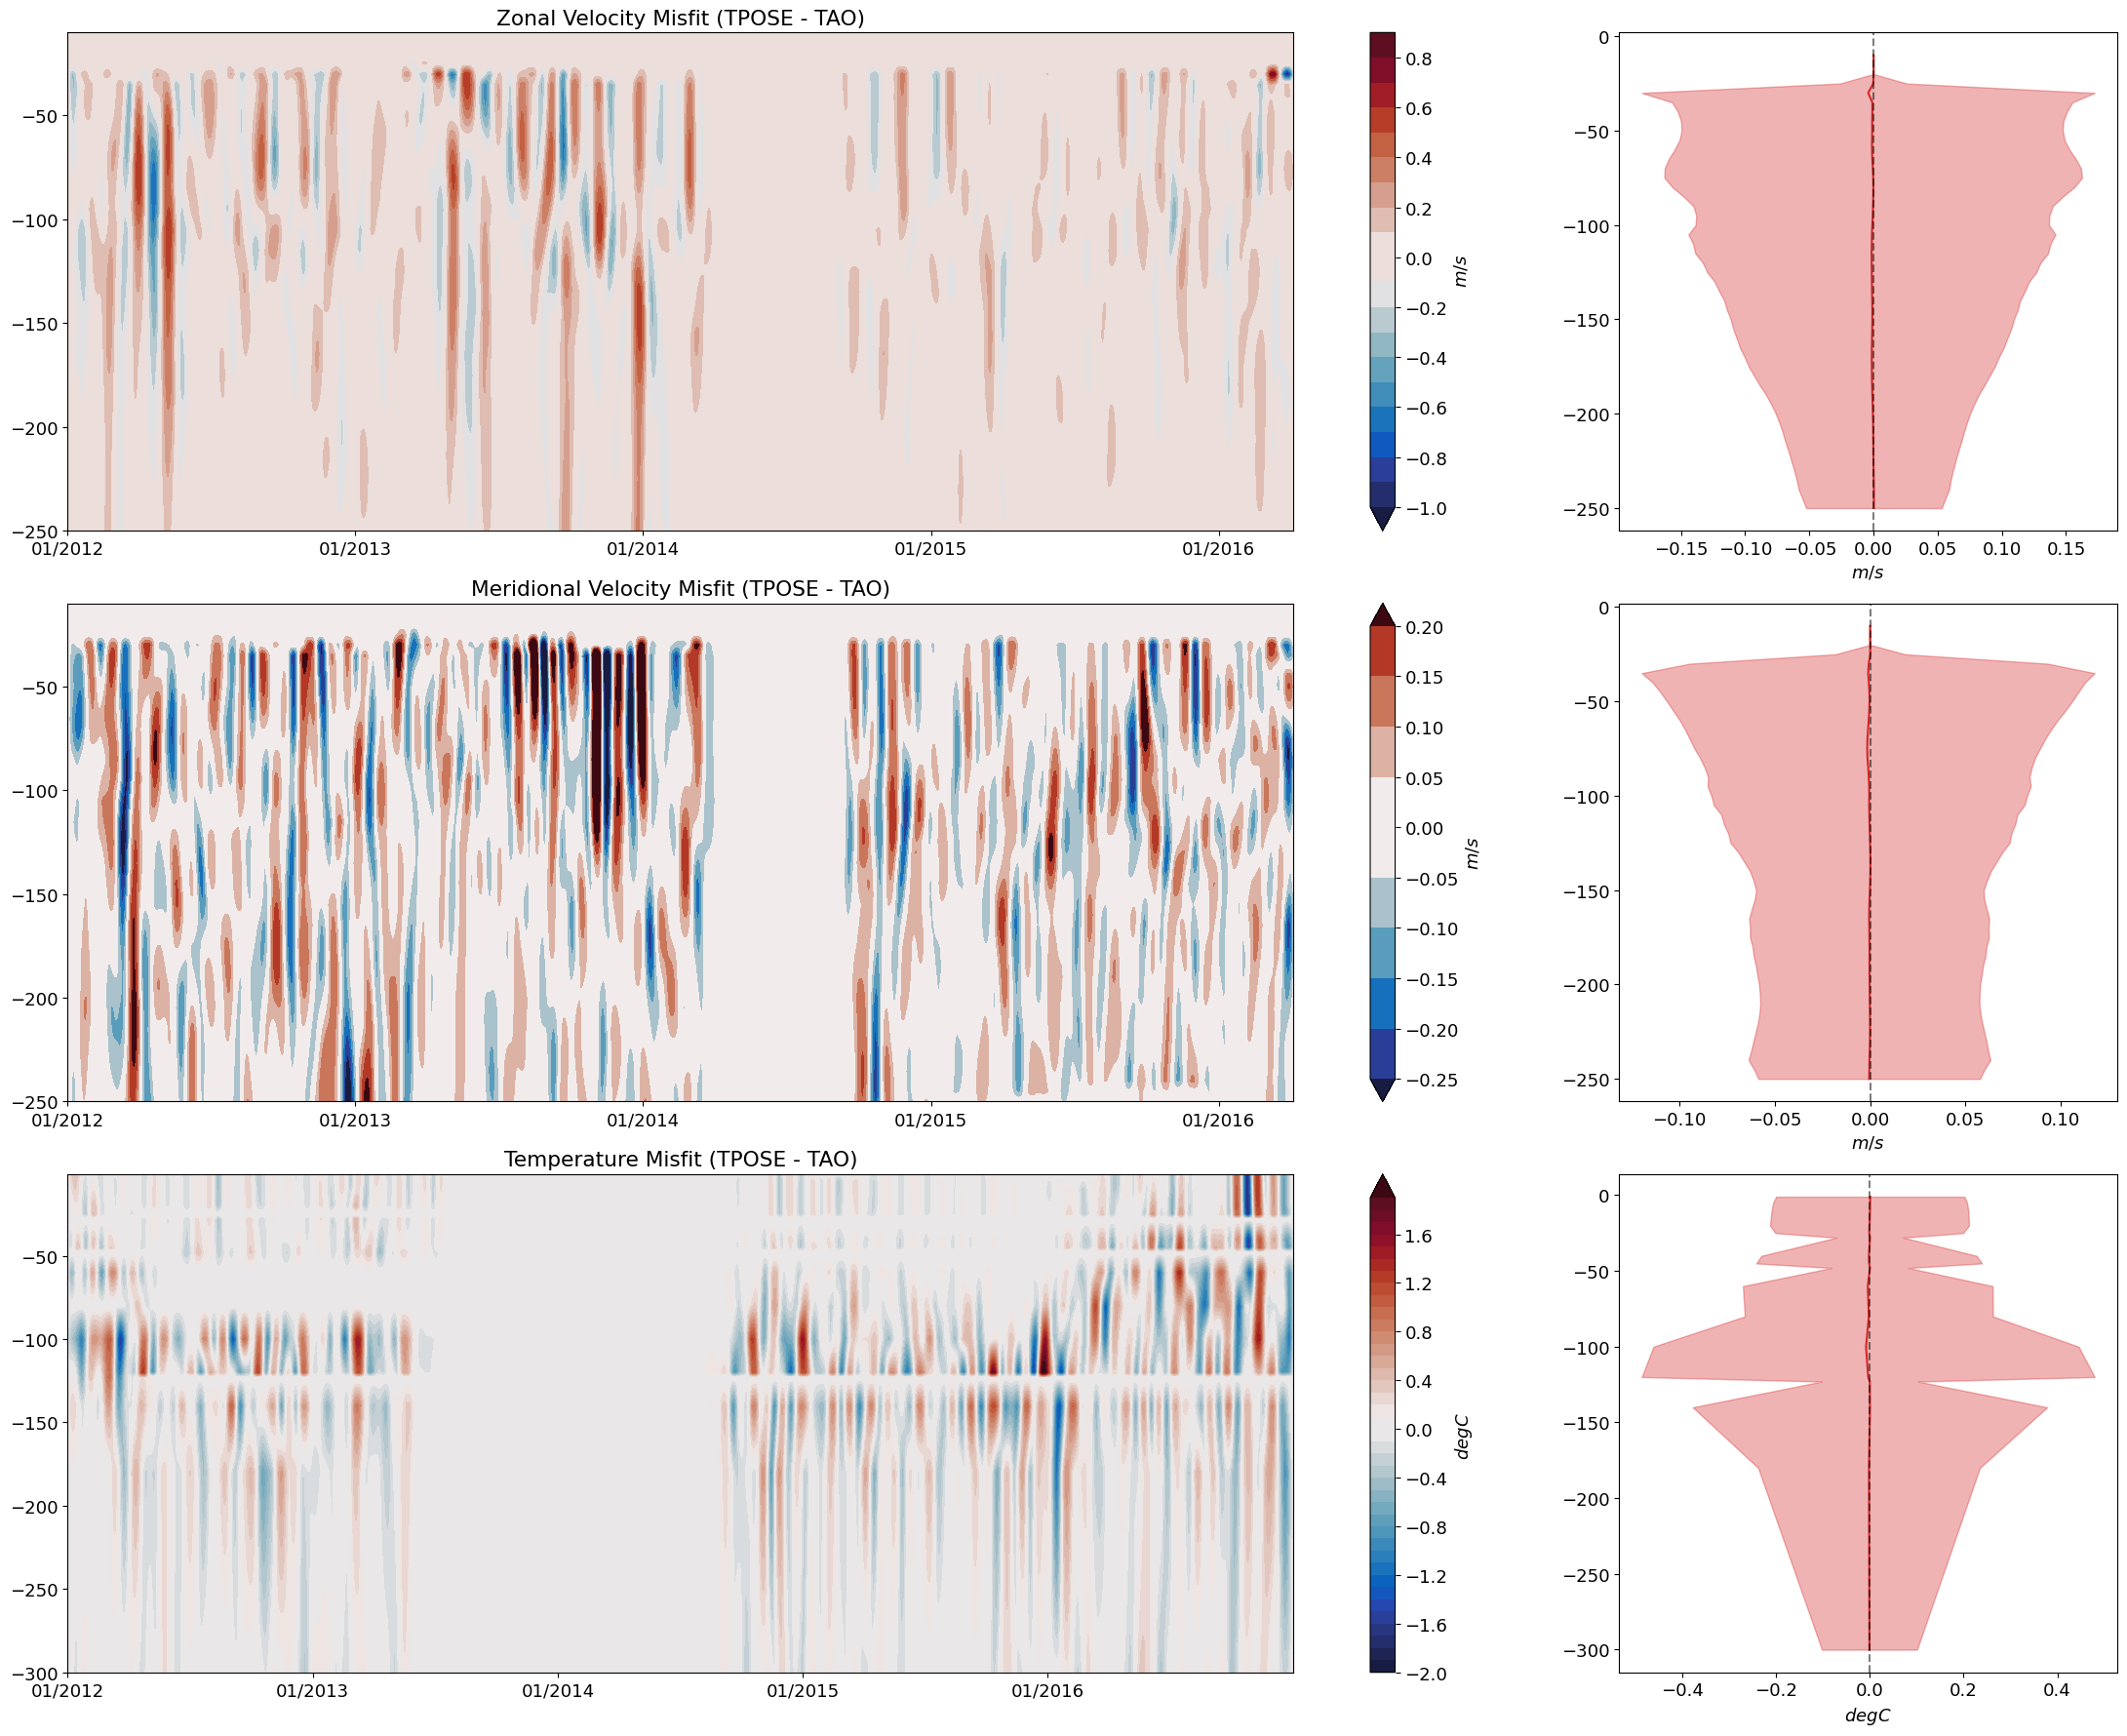

In [31]:
# ----------------------------------------------------------- Plotting -----------------------------------------------------------------------------------------

vmin = -1.0
vmax = 1.0
levels = np.arange(vmin,vmax,0.1)
x_axis = np.arange(0,1800,365)
x_labels = ['01/2012','01/2013','01/2014','01/2015','01/2016']

fig = plt.figure(figsize=(22,18))
grid = gs.GridSpec(15, 12)

ax1 = plt.subplot(grid[0:5,0:9])
(U_140_diff[:,Udepthli:Udepthui].T).plot.contourf(ax=ax1,levels=levels,cmap=cmo.balance,cbar_kwargs={'label':'$m/s$'},norm=TwoSlopeNorm(vmin=vmin,vcenter=0,vmax=vmax))
ax1.set_xlabel('')
ax1.set_xticks(x_axis)
ax1.set_xticklabels(x_labels)
ax1.set_ylabel('')
ax1.set_title('Zonal Velocity Misfit (TPOSE - TAO)')

ax2 = plt.subplot(grid[0:5,9:])
ax2.plot(meanU_diff_140[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],color='tab:red')
ax2.fill_betweenx(U_TAO_140.depth[Udepthli:Udepthui],meanU_diff_140[Udepthli:Udepthui]-stdU_diff_140[Udepthli:Udepthui],meanU_diff_140[Udepthli:Udepthui]+stdU_diff_140[Udepthli:Udepthui],color='tab:red',label='_nolegend_',alpha=0.35)
ax2.axvline(0,linestyle='--',color='k',alpha=0.5)
ax2.set_xlabel('$m/s$')

vmin = -0.25
vmax = 0.25
levels = np.arange(vmin,vmax,0.05)

ax3 = plt.subplot(grid[5:10,0:9])
(V_140_diff[:,Udepthli:Udepthui].T).plot.contourf(ax=ax3,levels=levels,cmap=cmo.balance,cbar_kwargs={'label':'$m/s$'},norm=TwoSlopeNorm(vmin=vmin,vcenter=0,vmax=vmax))
ax3.set_xlabel('')
ax3.set_xticks(x_axis)
ax3.set_xticklabels(x_labels)
ax3.set_ylabel('')
ax3.set_title('Meridional Velocity Misfit (TPOSE - TAO)')

ax4 = plt.subplot(grid[5:10,9:])
ax4.plot(meanV_diff_140[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],color='tab:red')
ax4.fill_betweenx(V_TAO_140.depth[Udepthli:Udepthui],meanV_diff_140[Udepthli:Udepthui]-stdV_diff_140[Udepthli:Udepthui],meanV_diff_140[Udepthli:Udepthui]+stdV_diff_140[Udepthli:Udepthui],color='tab:red',label='_nolegend_',alpha=0.35)
ax4.axvline(0,linestyle='--',color='k',alpha=0.5)
ax4.set_xlabel('$m/s$')

vmin = -2
vmax = 2
levels = np.arange(vmin,vmax,0.1)

ax5 = plt.subplot(grid[10:,0:9])
(T_140_diff[:,Tdepthli:Tdepthui].T).plot.contourf(ax=ax5,levels=levels,cmap=cmo.balance,cbar_kwargs={'label':'$deg C$'},norm=TwoSlopeNorm(vmin=vmin,vcenter=0,vmax=vmax))
ax5.set_xlabel('')
ax5.set_xticks(x_axis)
ax5.set_xticklabels(x_labels)
ax5.set_ylabel('')
ax5.set_title('Temperature Misfit (TPOSE - TAO)')

ax6 = plt.subplot(grid[10:,9:])
ax6.plot(meanT_diff_140[Tdepthli:Tdepthui],T_TAO_140.depth[Tdepthli:Tdepthui],color='tab:red')
ax6.fill_betweenx(T_TAO_140.depth[Tdepthli:Tdepthui],meanT_diff_140[Tdepthli:Tdepthui]-stdT_diff_140[Tdepthli:Tdepthui],meanT_diff_140[Tdepthli:Tdepthui]+stdT_diff_140[Tdepthli:Tdepthui],color='tab:red',label='_nolegend_',alpha=0.35)
ax6.axvline(0,linestyle='--',color='k',alpha=0.5)
ax6.set_xlabel('$degC$')

plt.tight_layout()
# image_str = 'TAO_TPOSE6_2012to2016_140W_misfit_midFreq.png'
# plt.savefig(image_str,format='png')
# plt.close()
plt.show()

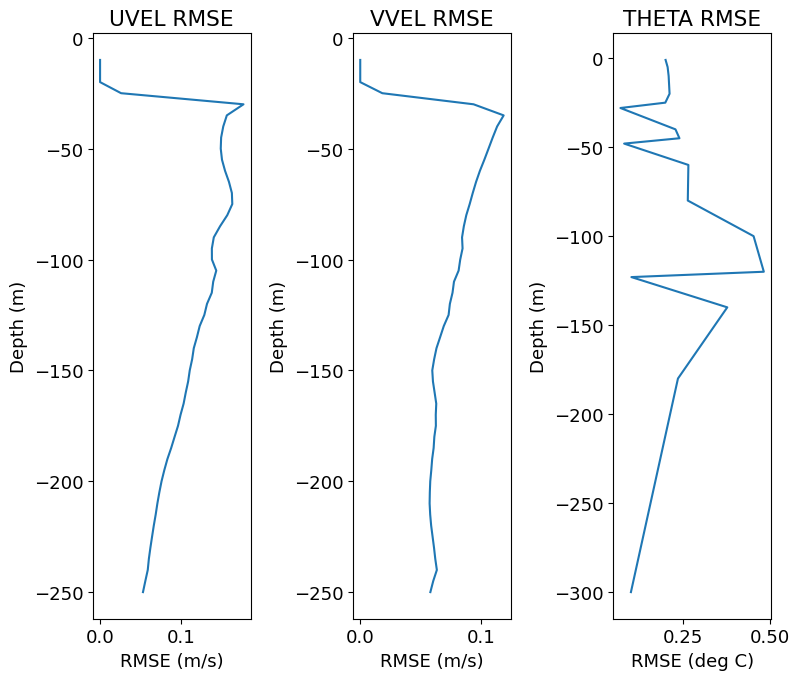

In [52]:
from sklearn.metrics import mean_squared_error

N, _ = TPOSE_U_midFreq.shape
rmse_U_medFreq = np.sqrt((((TPOSE_U_midFreq-TAO_U_midFreq)**2).mean(axis=0)))
rmse_V_medFreq = np.sqrt((((TPOSE_V_midFreq-TAO_V_midFreq)**2).mean(axis=0)))
rmse_T_medFreq = np.sqrt((((TPOSE_T_midFreq-TAO_T_midFreq)**2).mean(axis=0)))

fig, ax = plt.subplots(1,3,figsize=(8,7))
ax[0].plot(rmse_U_medFreq[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],label='U')
ax[0].set_title('UVEL RMSE')
ax[0].set_xlabel('RMSE (m/s)')
ax[0].set_ylabel('Depth (m)')

ax[1].plot(rmse_V_medFreq[Udepthli:Udepthui],V_TAO_140.depth[Udepthli:Udepthui],label='V')
ax[1].set_title('VVEL RMSE')
ax[1].set_xlabel('RMSE (m/s)')
ax[1].set_ylabel('Depth (m)')

ax[2].plot(rmse_T_medFreq[Tdepthli:Tdepthui],T_TAO_140.depth[Tdepthli:Tdepthui],label='T')
ax[2].set_title('THETA RMSE')
ax[2].set_xlabel('RMSE (deg C)')
ax[2].set_ylabel('Depth (m)')

plt.tight_layout()
plt.show()

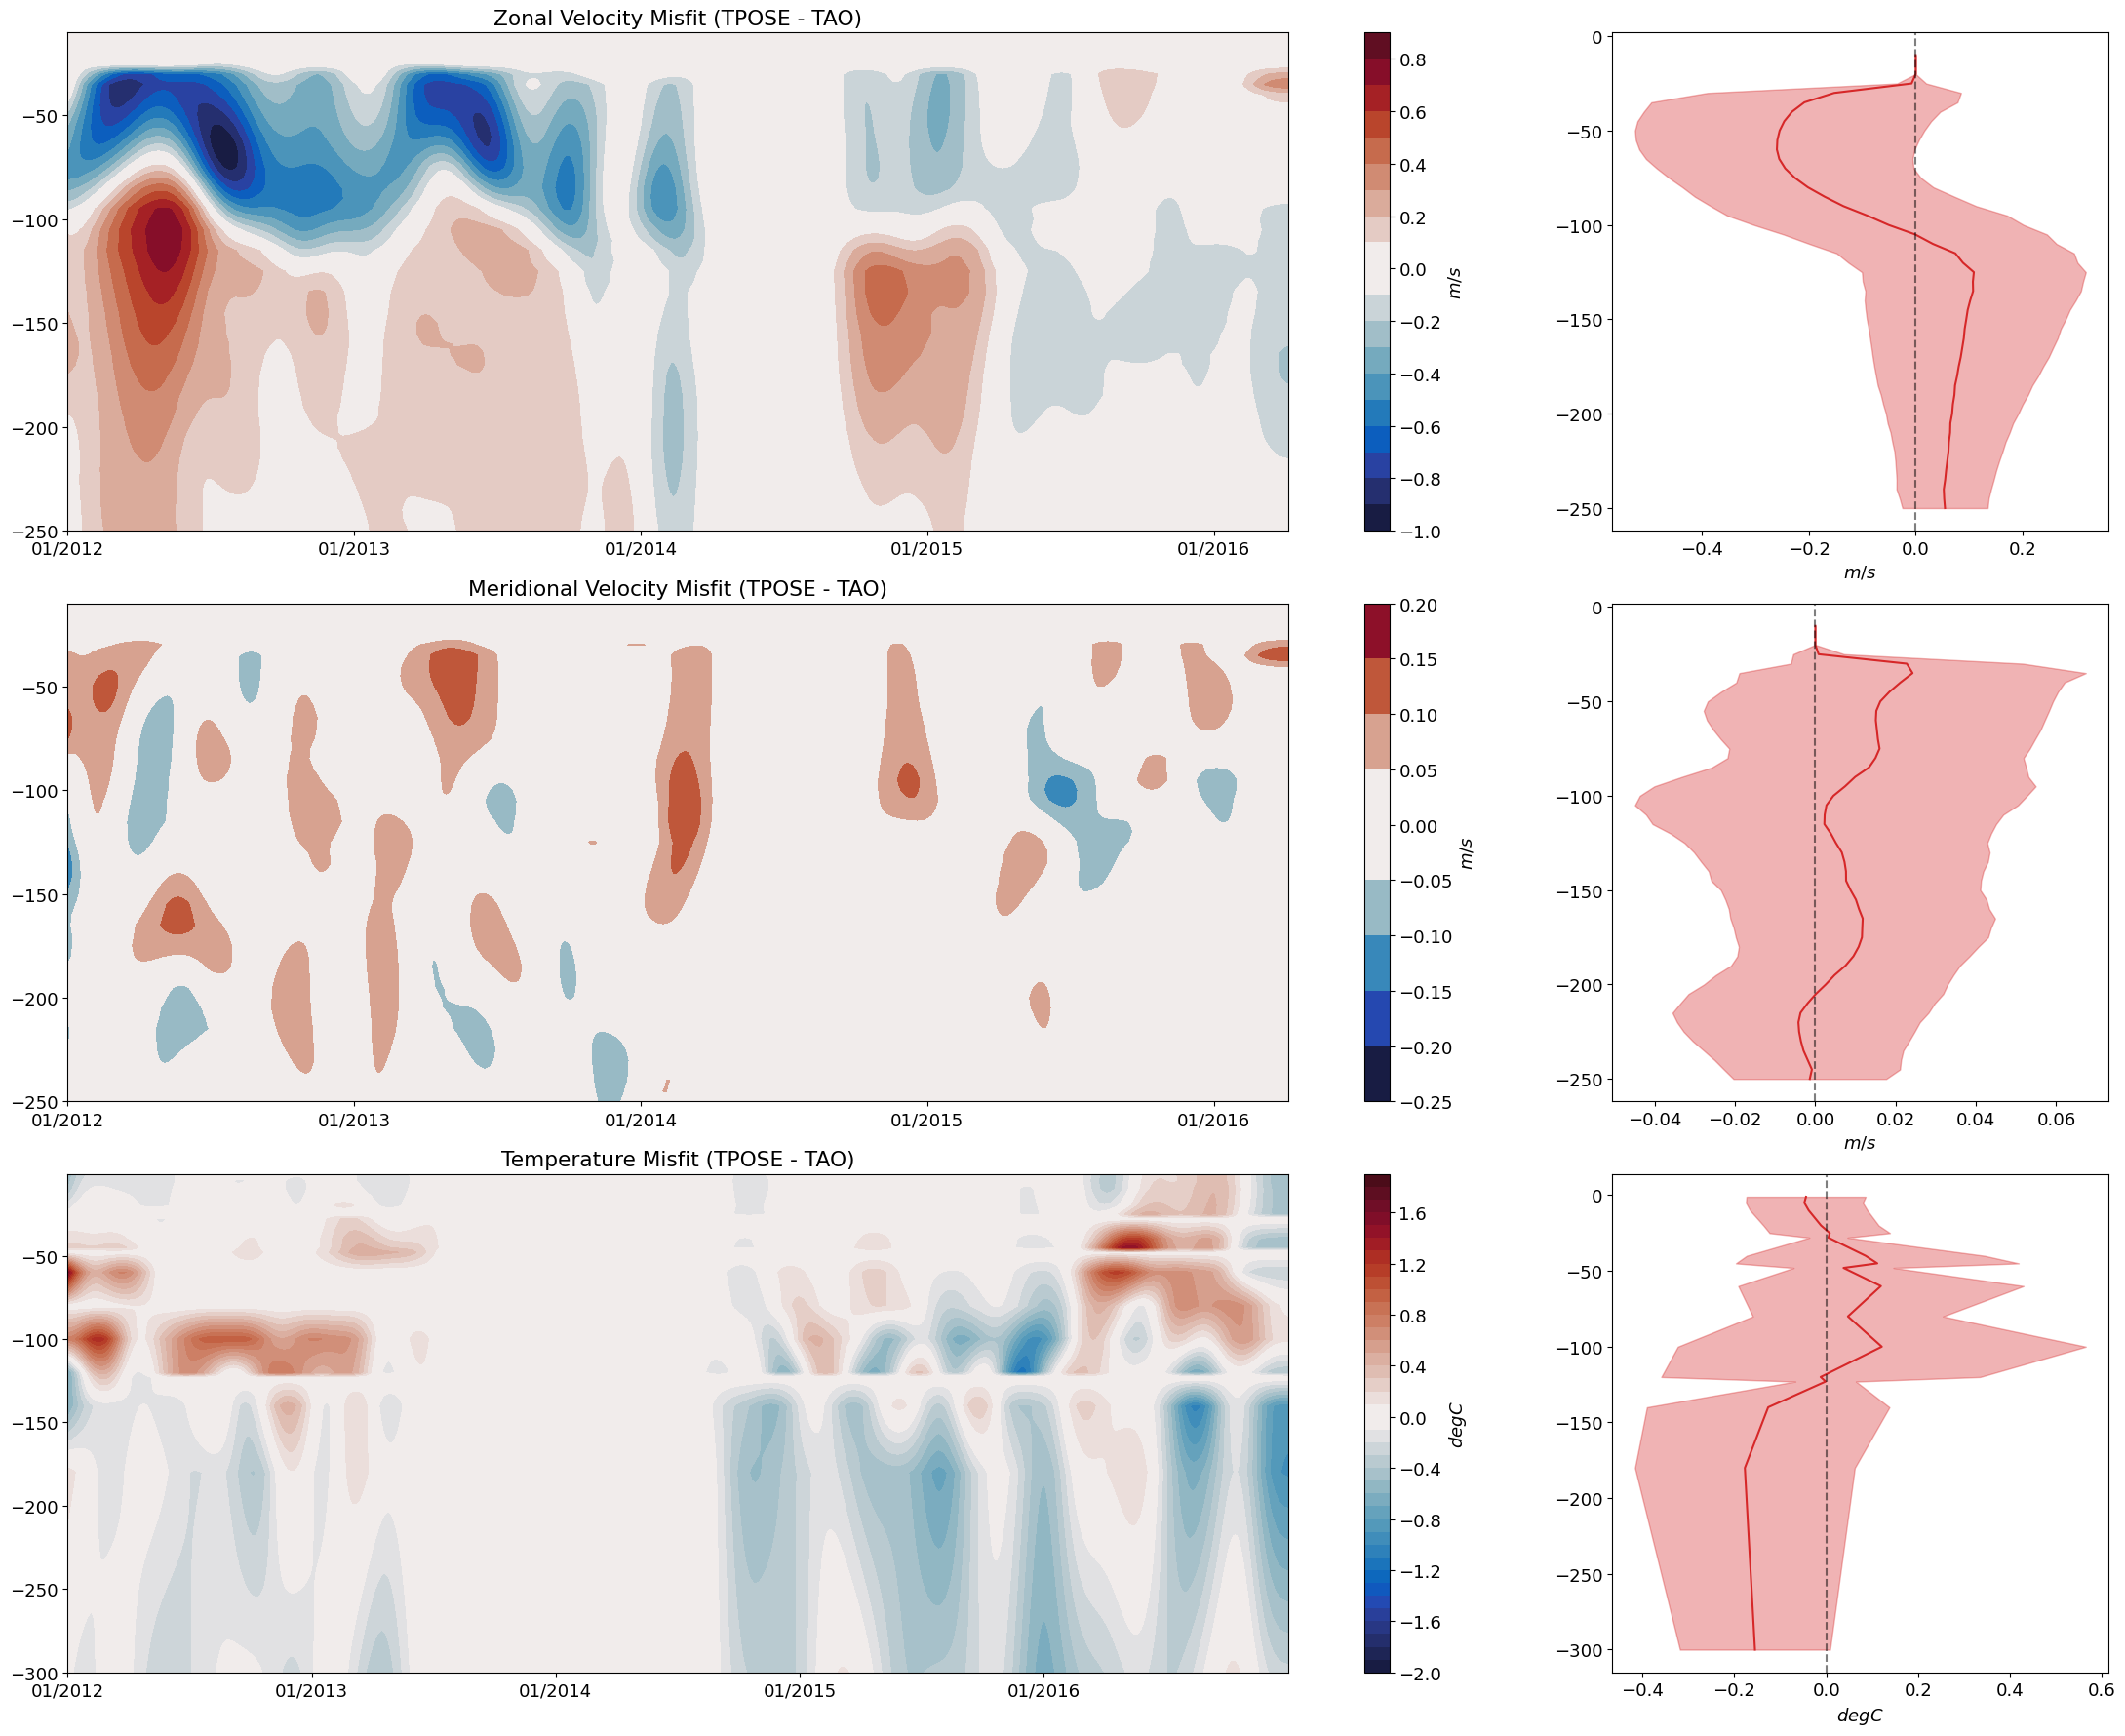

In [51]:
# ----------------------------------------------------------- Filter -----------------------------------------------------------------------------------------

# filtering out high frequency changes
fs = 1/86400 # sampling rate is 1 day (86400 seconds per day)

# lowpass
highF = (1/100)*fs
order = 4
sos = butter(order, np.array(highF), 'lowpass', fs=fs, output='sos')

TPOSE_U_low = sosfiltfilt(sos, U6_140 , axis=0)
TAO_U_low = sosfiltfilt(sos, U_TAO_140, axis=0)

TPOSE_V_low = sosfiltfilt(sos, V6_140 , axis=0)
TAO_V_low = sosfiltfilt(sos, V_TAO_140, axis=0)

TPOSE_T_low = sosfiltfilt(sos, T6_140 , axis=0)
TAO_T_low = sosfiltfilt(sos, T_TAO_140, axis=0)

T_140_diff = TPOSE_T_low - TAO_T_low
U_140_diff = TPOSE_U_low - TAO_U_low
V_140_diff = TPOSE_V_low - TAO_V_low

temp = T_TAO_140.copy(deep=True)
temp.values = T_140_diff
T_140_diff = temp

temp = U_TAO_140.copy(deep=True)
temp.values = U_140_diff
U_140_diff = temp

temp = V_TAO_140.copy(deep=True)
temp.values = V_140_diff
V_140_diff = temp

meanT_diff_140 = np.nanmean(T_140_diff,axis=0)
stdT_diff_140 = np.nanstd(T_140_diff,axis=0)

meanU_diff_140 = np.nanmean(U_140_diff,axis=0)
stdU_diff_140 = np.nanstd(U_140_diff,axis=0)

meanV_diff_140 = np.nanmean(V_140_diff,axis=0)
stdV_diff_140 = np.nanstd(V_140_diff,axis=0)

# ----------------------------------------------------------- Plotting -----------------------------------------------------------------------------------------

vmin = -1.0
vmax = 1.0
levels = np.arange(vmin,vmax,0.1)
x_axis = np.arange(0,1800,365)
x_labels = ['01/2012','01/2013','01/2014','01/2015','01/2016']

fig = plt.figure(figsize=(22,18))
grid = gs.GridSpec(15, 12)

ax1 = plt.subplot(grid[0:5,0:9])
(U_140_diff[:,Udepthli:Udepthui].T).plot.contourf(ax=ax1,levels=levels,cmap=cmo.balance,cbar_kwargs={'label':'$m/s$'},norm=TwoSlopeNorm(vmin=vmin,vcenter=0,vmax=vmax))
ax1.set_xlabel('')
ax1.set_xticks(x_axis)
ax1.set_xticklabels(x_labels)
ax1.set_ylabel('')
ax1.set_title('Zonal Velocity Misfit (TPOSE - TAO)')

ax2 = plt.subplot(grid[0:5,9:])
ax2.plot(meanU_diff_140[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],color='tab:red')
ax2.fill_betweenx(U_TAO_140.depth[Udepthli:Udepthui],meanU_diff_140[Udepthli:Udepthui]-stdU_diff_140[Udepthli:Udepthui],meanU_diff_140[Udepthli:Udepthui]+stdU_diff_140[Udepthli:Udepthui],color='tab:red',label='_nolegend_',alpha=0.35)
ax2.axvline(0,linestyle='--',color='k',alpha=0.5)
ax2.set_xlabel('$m/s$')

vmin = -0.25
vmax = 0.25
levels = np.arange(vmin,vmax,0.05)

ax3 = plt.subplot(grid[5:10,0:9])
(V_140_diff[:,Udepthli:Udepthui].T).plot.contourf(ax=ax3,levels=levels,cmap=cmo.balance,cbar_kwargs={'label':'$m/s$'},norm=TwoSlopeNorm(vmin=vmin,vcenter=0,vmax=vmax))
ax3.set_xlabel('')
ax3.set_xticks(x_axis)
ax3.set_xticklabels(x_labels)
ax3.set_ylabel('')
ax3.set_title('Meridional Velocity Misfit (TPOSE - TAO)')

ax4 = plt.subplot(grid[5:10,9:])
ax4.plot(meanV_diff_140[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],color='tab:red')
ax4.fill_betweenx(V_TAO_140.depth[Udepthli:Udepthui],meanV_diff_140[Udepthli:Udepthui]-stdV_diff_140[Udepthli:Udepthui],meanV_diff_140[Udepthli:Udepthui]+stdV_diff_140[Udepthli:Udepthui],color='tab:red',label='_nolegend_',alpha=0.35)
ax4.axvline(0,linestyle='--',color='k',alpha=0.5)
ax4.set_xlabel('$m/s$')

vmin = -2
vmax = 2
levels = np.arange(vmin,vmax,0.1)

ax5 = plt.subplot(grid[10:,0:9])
(T_140_diff[:,Tdepthli:Tdepthui].T).plot.contourf(ax=ax5,levels=levels,cmap=cmo.balance,cbar_kwargs={'label':'$deg C$'},norm=TwoSlopeNorm(vmin=vmin,vcenter=0,vmax=vmax))
ax5.set_xlabel('')
ax5.set_xticks(x_axis)
ax5.set_xticklabels(x_labels)
ax5.set_ylabel('')
ax5.set_title('Temperature Misfit (TPOSE - TAO)')

ax6 = plt.subplot(grid[10:,9:])
ax6.plot(meanT_diff_140[Tdepthli:Tdepthui],T_TAO_140.depth[Tdepthli:Tdepthui],color='tab:red')
ax6.fill_betweenx(T_TAO_140.depth[Tdepthli:Tdepthui],meanT_diff_140[Tdepthli:Tdepthui]-stdT_diff_140[Tdepthli:Tdepthui],meanT_diff_140[Tdepthli:Tdepthui]+stdT_diff_140[Tdepthli:Tdepthui],color='tab:red',label='_nolegend_',alpha=0.35)
ax6.axvline(0,linestyle='--',color='k',alpha=0.5)
ax6.set_xlabel('$degC$')

plt.tight_layout()
plt.show()



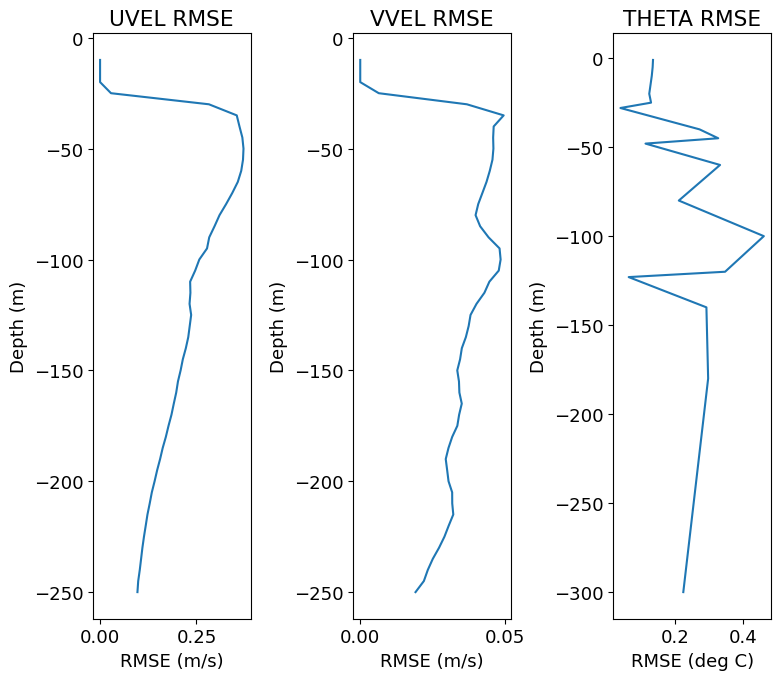

In [54]:
N, _ = TPOSE_U_midFreq.shape
rmse_U_lowFreq = np.sqrt((((TPOSE_U_low -TAO_U_low)**2).mean(axis=0)))
rmse_V_lowFreq = np.sqrt((((TPOSE_V_low -TAO_V_low)**2).mean(axis=0)))
rmse_T_lowFreq = np.sqrt((((TPOSE_T_low -TAO_T_low)**2).mean(axis=0)))

fig, ax = plt.subplots(1,3,figsize=(8,7))
ax[0].plot(rmse_U_lowFreq[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],label='U')
ax[0].set_title('UVEL RMSE')
ax[0].set_xlabel('RMSE (m/s)')
ax[0].set_ylabel('Depth (m)')

ax[1].plot(rmse_V_lowFreq[Udepthli:Udepthui],V_TAO_140.depth[Udepthli:Udepthui],label='V')
ax[1].set_title('VVEL RMSE')
ax[1].set_xlabel('RMSE (m/s)')
ax[1].set_ylabel('Depth (m)')

ax[2].plot(rmse_T_lowFreq[Tdepthli:Tdepthui],T_TAO_140.depth[Tdepthli:Tdepthui],label='T')
ax[2].set_title('THETA RMSE')
ax[2].set_xlabel('RMSE (deg C)')
ax[2].set_ylabel('Depth (m)')

plt.tight_layout()
plt.show()

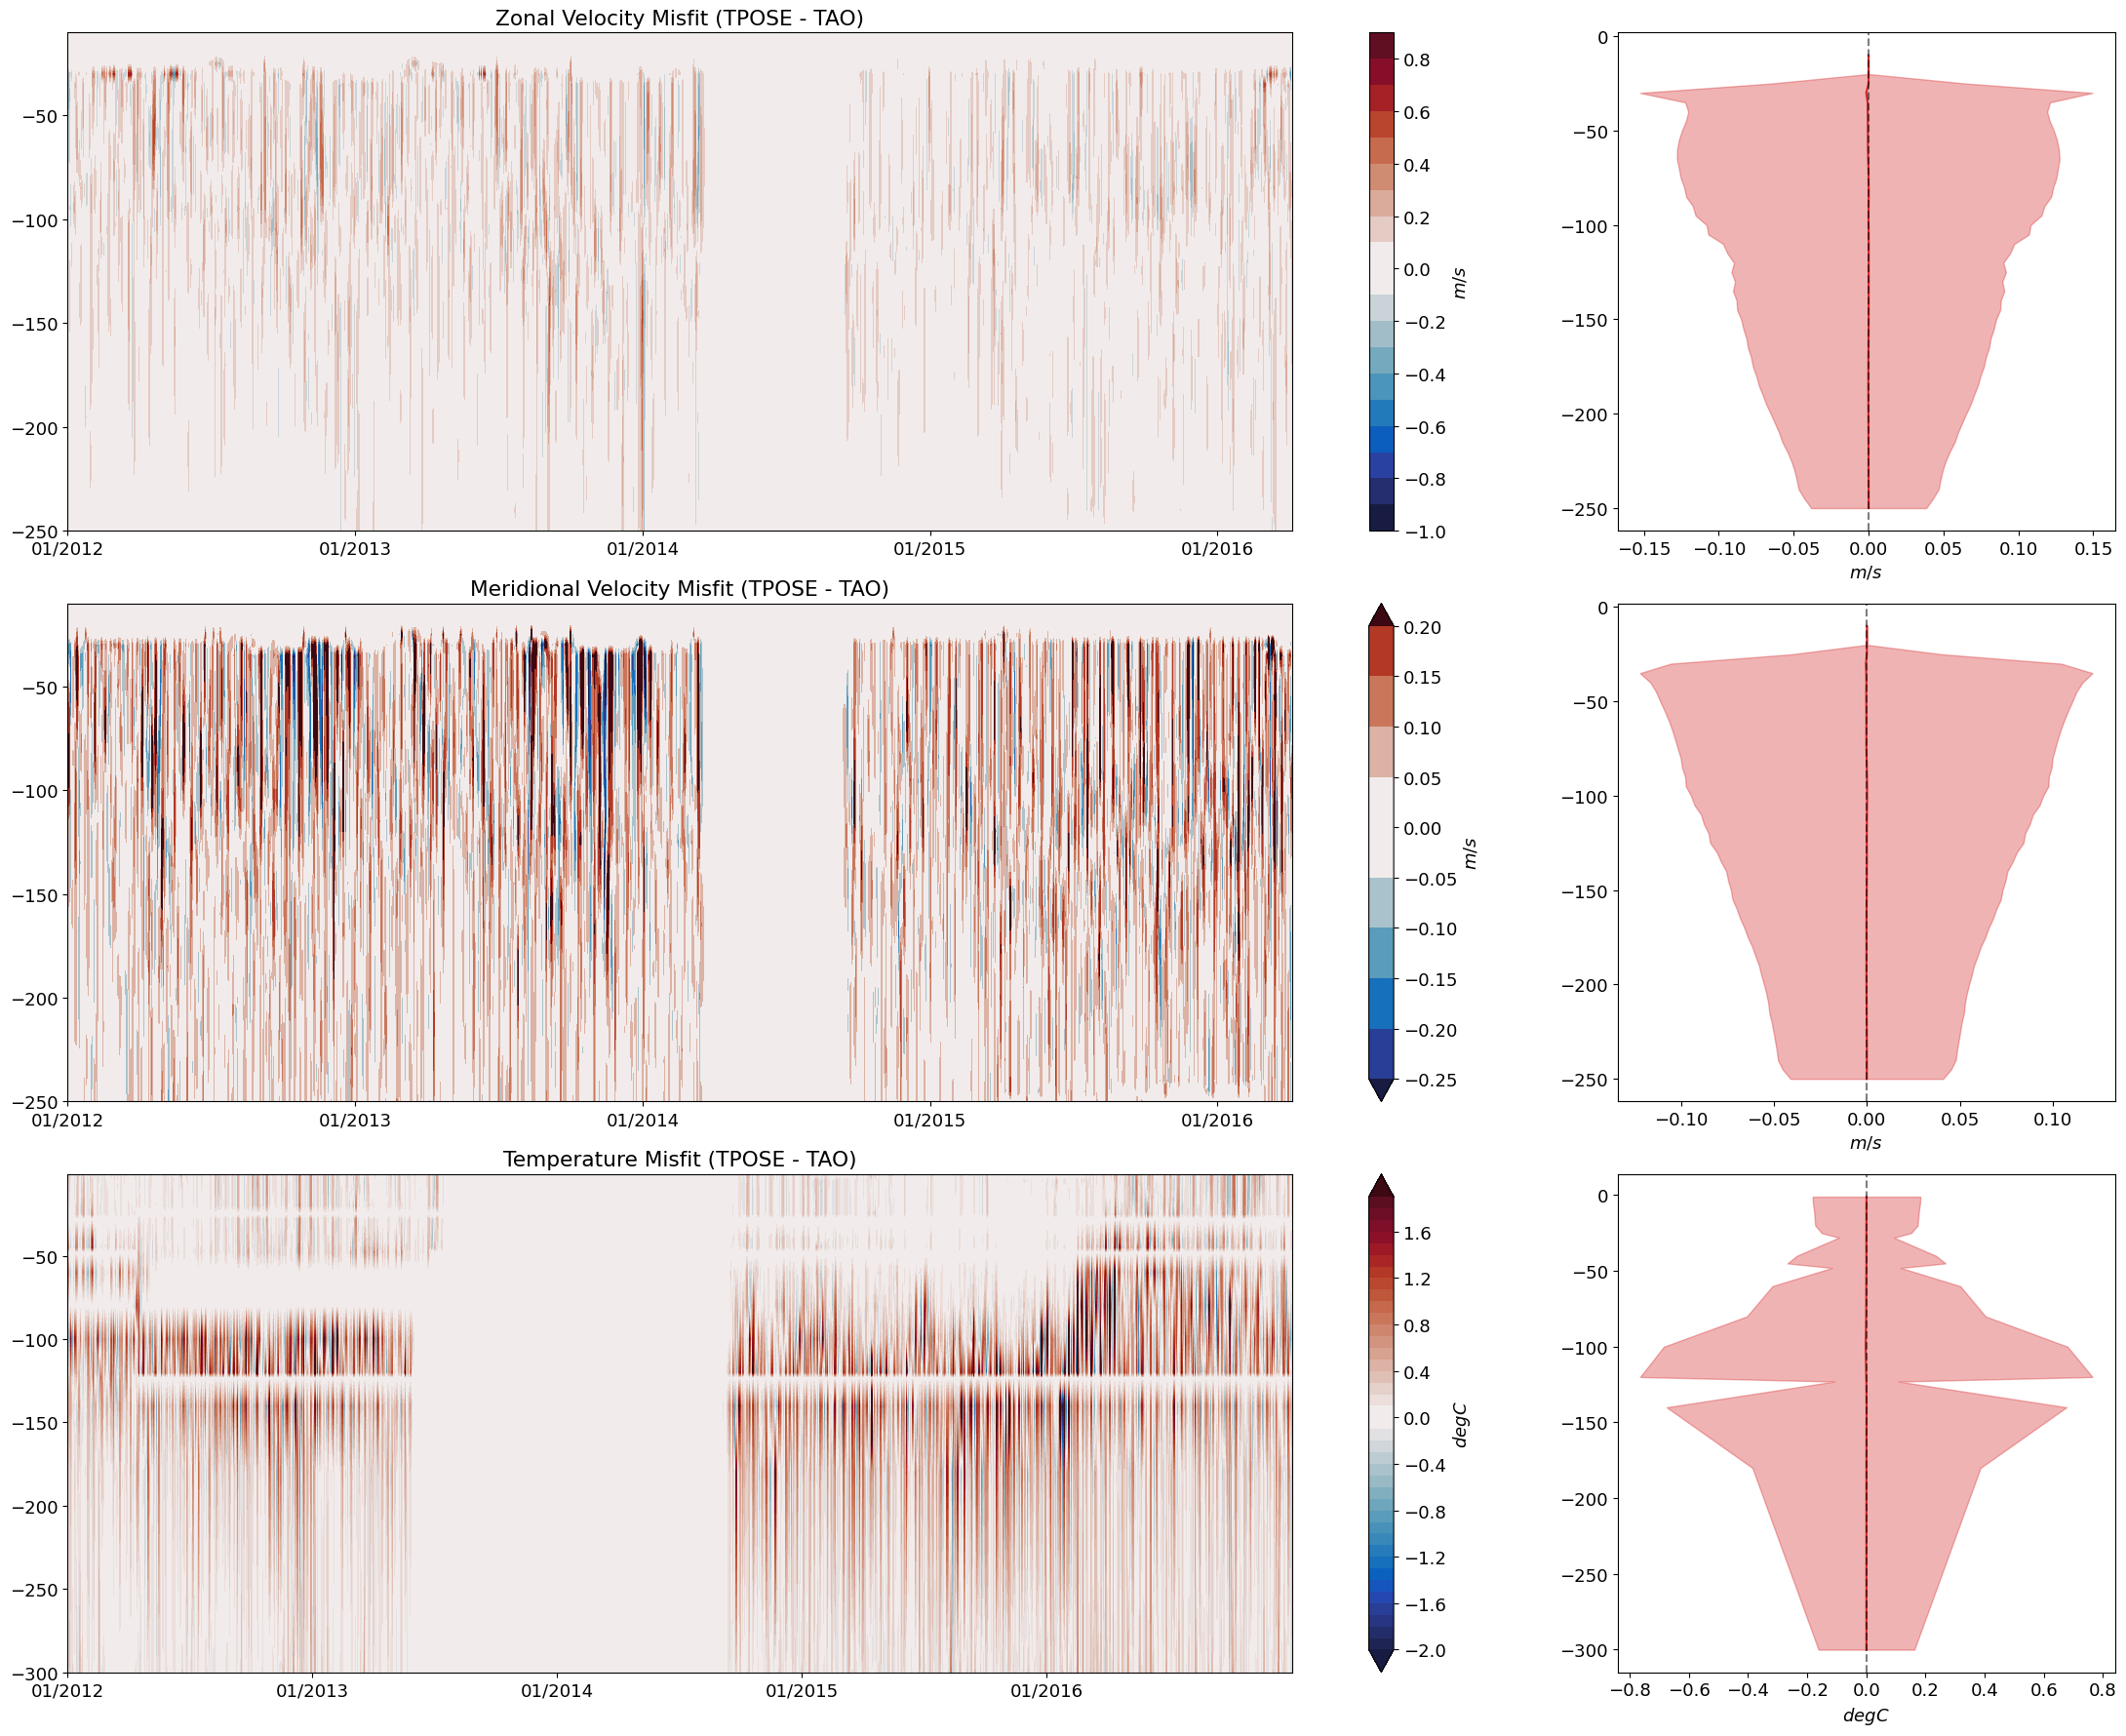

In [44]:
# ----------------------------------------------------------- Plotting -----------------------------------------------------------------------------------------

# highpass filter
fs = 1/86400 # sampling rate is 1 day (86400 seconds per day)
lowF = (1/20)*fs 
cutoff = np.array(lowF)
order = 4
sos = butter(order, cutoff, 'highpass', fs=fs, output='sos')

TPOSE_U_sub20 = sosfiltfilt(sos, U6_140 , axis=0)
TAO_U_sub20 = sosfiltfilt(sos, U_TAO_140, axis=0)

TPOSE_V_sub20 = sosfiltfilt(sos, V6_140 , axis=0)
TAO_V_sub20 = sosfiltfilt(sos, V_TAO_140, axis=0)

TPOSE_T_sub20 = sosfiltfilt(sos, T6_140 , axis=0)
TAO_T_sub20 = sosfiltfilt(sos, T_TAO_140, axis=0)

T_140_diff = TPOSE_T_sub20 - TAO_T_sub20
U_140_diff = TPOSE_U_sub20 - TAO_U_sub20
V_140_diff = TPOSE_V_sub20 - TAO_V_sub20

temp = T_TAO_140.copy(deep=True)
temp.values = T_140_diff
T_140_diff = temp

temp = U_TAO_140.copy(deep=True)
temp.values = U_140_diff
U_140_diff = temp

temp = V_TAO_140.copy(deep=True)
temp.values = V_140_diff
V_140_diff = temp

meanT_diff_140 = np.nanmean(T_140_diff,axis=0)
stdT_diff_140 = np.nanstd(T_140_diff,axis=0)

meanU_diff_140 = np.nanmean(U_140_diff,axis=0)
stdU_diff_140 = np.nanstd(U_140_diff,axis=0)

meanV_diff_140 = np.nanmean(V_140_diff,axis=0)
stdV_diff_140 = np.nanstd(V_140_diff,axis=0)

# ----------------------------------------------------------- Plotting -----------------------------------------------------------------------------------------

vmin = -1.0
vmax = 1.0
levels = np.arange(vmin,vmax,0.1)
x_axis = np.arange(0,1800,365)
x_labels = ['01/2012','01/2013','01/2014','01/2015','01/2016']

fig = plt.figure(figsize=(22,18))
grid = gs.GridSpec(15, 12)

ax1 = plt.subplot(grid[0:5,0:9])
(U_140_diff[:,Udepthli:Udepthui].T).plot.contourf(ax=ax1,levels=levels,cmap=cmo.balance,cbar_kwargs={'label':'$m/s$'},norm=TwoSlopeNorm(vmin=vmin,vcenter=0,vmax=vmax))
ax1.set_xlabel('')
ax1.set_xticks(x_axis)
ax1.set_xticklabels(x_labels)
ax1.set_ylabel('')
ax1.set_title('Zonal Velocity Misfit (TPOSE - TAO)')

ax2 = plt.subplot(grid[0:5,9:])
ax2.plot(meanU_diff_140[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],color='tab:red')
ax2.fill_betweenx(U_TAO_140.depth[Udepthli:Udepthui],meanU_diff_140[Udepthli:Udepthui]-stdU_diff_140[Udepthli:Udepthui],meanU_diff_140[Udepthli:Udepthui]+stdU_diff_140[Udepthli:Udepthui],color='tab:red',label='_nolegend_',alpha=0.35)
ax2.axvline(0,linestyle='--',color='k',alpha=0.5)
ax2.set_xlabel('$m/s$')

vmin = -0.25
vmax = 0.25
levels = np.arange(vmin,vmax,0.05)

ax3 = plt.subplot(grid[5:10,0:9])
(V_140_diff[:,Udepthli:Udepthui].T).plot.contourf(ax=ax3,levels=levels,cmap=cmo.balance,cbar_kwargs={'label':'$m/s$'},norm=TwoSlopeNorm(vmin=vmin,vcenter=0,vmax=vmax))
ax3.set_xlabel('')
ax3.set_xticks(x_axis)
ax3.set_xticklabels(x_labels)
ax3.set_ylabel('')
ax3.set_title('Meridional Velocity Misfit (TPOSE - TAO)')

ax4 = plt.subplot(grid[5:10,9:])
ax4.plot(meanV_diff_140[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],color='tab:red')
ax4.fill_betweenx(V_TAO_140.depth[Udepthli:Udepthui],meanV_diff_140[Udepthli:Udepthui]-stdV_diff_140[Udepthli:Udepthui],meanV_diff_140[Udepthli:Udepthui]+stdV_diff_140[Udepthli:Udepthui],color='tab:red',label='_nolegend_',alpha=0.35)
ax4.axvline(0,linestyle='--',color='k',alpha=0.5)
ax4.set_xlabel('$m/s$')

vmin = -2
vmax = 2
levels = np.arange(vmin,vmax,0.1)

ax5 = plt.subplot(grid[10:,0:9])
(T_140_diff[:,Tdepthli:Tdepthui].T).plot.contourf(ax=ax5,levels=levels,cmap=cmo.balance,cbar_kwargs={'label':'$deg C$'},norm=TwoSlopeNorm(vmin=vmin,vcenter=0,vmax=vmax))
ax5.set_xlabel('')
ax5.set_xticks(x_axis)
ax5.set_xticklabels(x_labels)
ax5.set_ylabel('')
ax5.set_title('Temperature Misfit (TPOSE - TAO)')

ax6 = plt.subplot(grid[10:,9:])
ax6.plot(meanT_diff_140[Tdepthli:Tdepthui],T_TAO_140.depth[Tdepthli:Tdepthui],color='tab:red')
ax6.fill_betweenx(T_TAO_140.depth[Tdepthli:Tdepthui],meanT_diff_140[Tdepthli:Tdepthui]-stdT_diff_140[Tdepthli:Tdepthui],meanT_diff_140[Tdepthli:Tdepthui]+stdT_diff_140[Tdepthli:Tdepthui],color='tab:red',label='_nolegend_',alpha=0.35)
ax6.axvline(0,linestyle='--',color='k',alpha=0.5)
ax6.set_xlabel('$degC$')

plt.tight_layout()
plt.show()


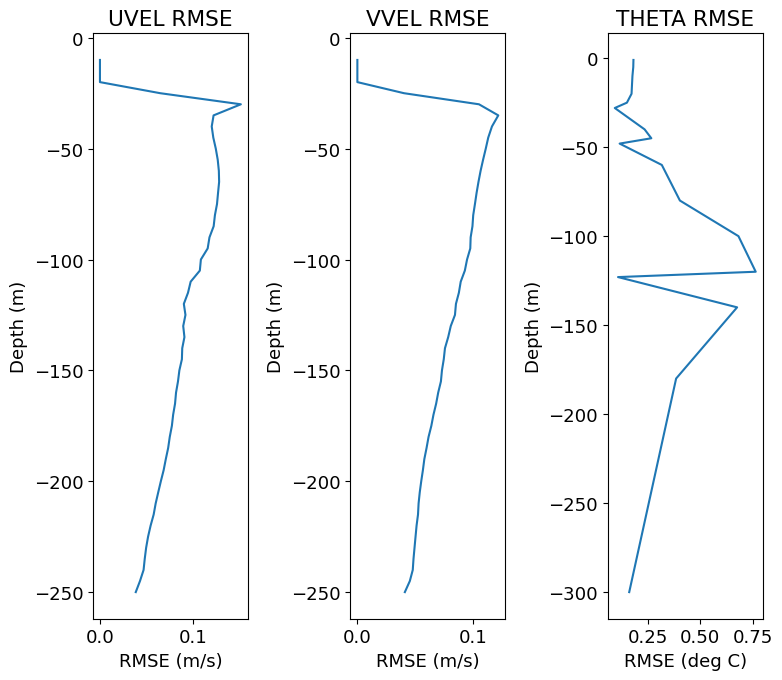

In [55]:
N, _ = TPOSE_U_midFreq.shape
rmse_U_hiFreq = np.sqrt((((TPOSE_U_sub20 -TAO_U_sub20)**2).mean(axis=0)))
rmse_V_hiFreq = np.sqrt((((TPOSE_V_sub20 -TAO_V_sub20)**2).mean(axis=0)))
rmse_T_hiFreq = np.sqrt((((TPOSE_T_sub20 -TAO_T_sub20)**2).mean(axis=0)))

fig, ax = plt.subplots(1,3,figsize=(8,7))
ax[0].plot(rmse_U_hiFreq[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],label='U')
ax[0].set_title('UVEL RMSE')
ax[0].set_xlabel('RMSE (m/s)')
ax[0].set_ylabel('Depth (m)')

ax[1].plot(rmse_V_hiFreq[Udepthli:Udepthui],V_TAO_140.depth[Udepthli:Udepthui],label='V')
ax[1].set_title('VVEL RMSE')
ax[1].set_xlabel('RMSE (m/s)')
ax[1].set_ylabel('Depth (m)')

ax[2].plot(rmse_T_hiFreq[Tdepthli:Tdepthui],T_TAO_140.depth[Tdepthli:Tdepthui],label='T')
ax[2].set_title('THETA RMSE')
ax[2].set_xlabel('RMSE (deg C)')
ax[2].set_ylabel('Depth (m)')

plt.tight_layout()
plt.show()

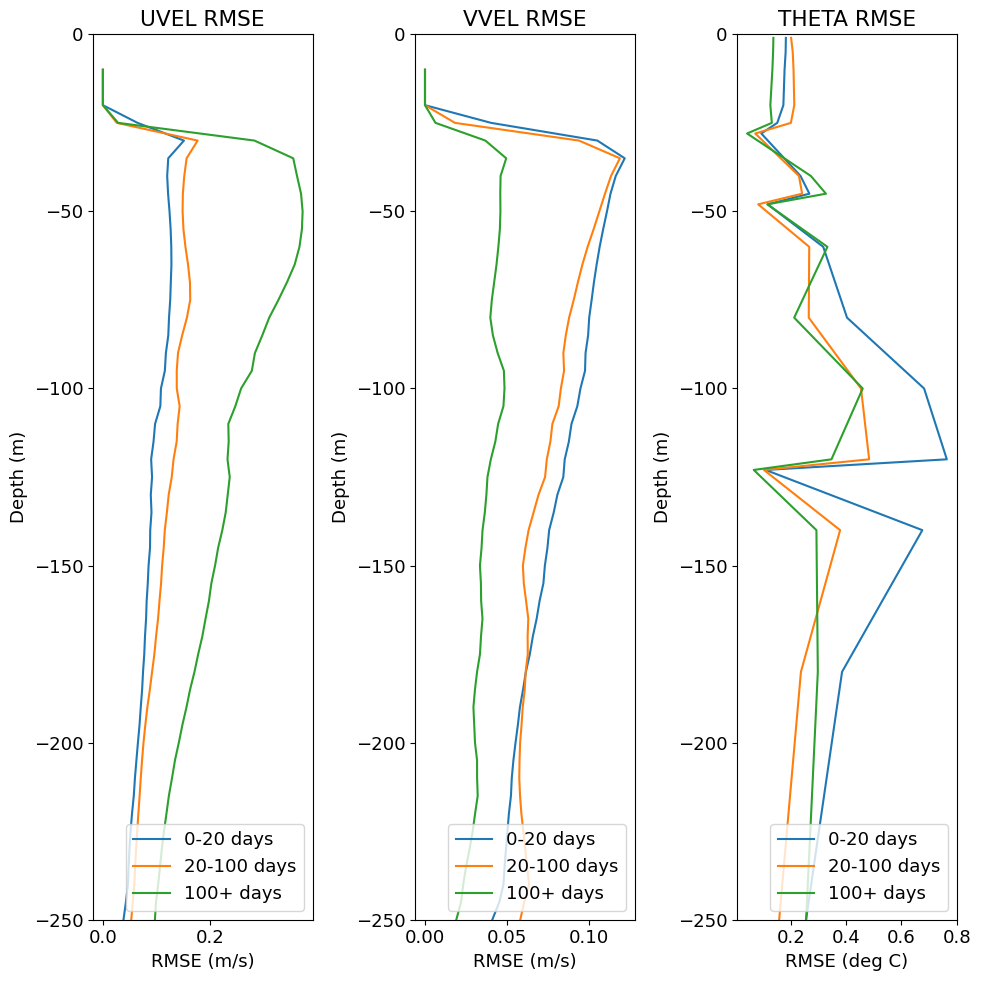

In [59]:

fig, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].plot(rmse_U_hiFreq[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],label='0-20 days')
ax[0].plot(rmse_U_medFreq[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],label='20-100 days')
ax[0].plot(rmse_U_lowFreq[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],label='100+ days')
ax[0].set_title('UVEL RMSE')
ax[0].set_xlabel('RMSE (m/s)')
ax[0].set_ylabel('Depth (m)')
ax[0].legend(loc='lower right')
ax[0].set_ylim(-250,0)

ax[1].plot(rmse_V_hiFreq[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],label='0-20 days')
ax[1].plot(rmse_V_medFreq[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],label='20-100 days')
ax[1].plot(rmse_V_lowFreq[Udepthli:Udepthui],U_TAO_140.depth[Udepthli:Udepthui],label='100+ days')
ax[1].legend(loc='lower right')
ax[1].set_title('VVEL RMSE')
ax[1].set_xlabel('RMSE (m/s)')
ax[1].set_ylabel('Depth (m)')
ax[1].set_ylim(-250,0)

ax[2].plot(rmse_T_hiFreq[Tdepthli:Tdepthui],T_TAO_140.depth[Tdepthli:Tdepthui],label='0-20 days')
ax[2].plot(rmse_T_medFreq[Tdepthli:Tdepthui],T_TAO_140.depth[Tdepthli:Tdepthui],label='20-100 days')
ax[2].plot(rmse_T_lowFreq[Tdepthli:Tdepthui],T_TAO_140.depth[Tdepthli:Tdepthui],label='100+ days')
ax[2].set_title('THETA RMSE')
ax[2].set_xlabel('RMSE (deg C)')
ax[2].set_ylabel('Depth (m)')
ax[2].legend(loc='lower right')
ax[2].set_ylim(-250,0)

plt.tight_layout()
plt.show()
